## Data description

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code | gender_map={1:'female',2:'male'}
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary | 0 = no 1= yes

All of the dataset values were collected at the moment of medical examination. 

## Initial data pre-processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px

C:\Users\Mary\AppData\Local\Temp\ipykernel_4080\4226471265.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df =  pd.read_csv("./Data/cardio_train.csv", sep = ";", index_col= "id")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


From the dataset description we find out that the age is in days, which is not that convenient for me, so I will transform this into age in years. I will make a copy of the dataset for this purpose.

In [4]:
df_years = df.rename(columns = {"age": "age_days"})
df_years["age_years"] = df_years["age_days"]/365

df_years.drop(["age_days"], axis = 1, inplace = True)
df_years.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
id,,,,,,,,,,,,
0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


Examining data for being accurate and consistent.

In [5]:
df_years.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.339358
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.759594
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.583562
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.394521
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.980822
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.430137
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.967123


* Age range is 29 - 64 years; There is some strange height and weight data, which is actually possible if studying Guinness World Records Book, but can probably cause problems with regression. So, I want to compute the **leverage statistic** for these columns; if the leverage statistic is high, I will gather this data in a separate dataset, to study them separately (will do it when analyzing BMI)

* ap_hi cannot be as high as 16020 and as low as -150. Same with ap_lo, so we'll have to clean these as well;



In [6]:
x = [(x - 165)**2 for x in df["height"]]
ss = np.sum(x)
lev = 1/70000 + (195 - 165)**2/ss
norm_lev = 2/70000
print(lev, norm_lev)

# very high leverage statistic for height 55
# создать функцию, которая собирает данные с leverage > norm_lev * 3.5 в отдельный dataset

0.00020387490820723196 2.857142857142857e-05


In [7]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
print (True in df.duplicated())

False


### Data Cleaning

Here I:
- have changed negative ap_hi and ap_lo to positive;
- have added "0" to the end of otherwise plausible ap_hi and ap_lo values (e.g. 12 -> 120);
- have removed ap_lo < 20 which didn't seem possible to correct by muliplying by 10;
- have removed the rows with ap_hi > 250, as I haven't found any pattern in this mistake;
- have removed the rows with ap_lo = 0;
- have removed an odd "0" from ap_lo > 200 (e.g. 1000 -> 100);
- plotted weights and heights and made a conclusion, that weights < 35 and heights <100 are not trustworthy in this dataset.


In [9]:
df.loc[:, 'ap_hi']<30

id
0        False
1        False
2        False
3        False
4        False
         ...  
99993    False
99995    False
99996    False
99998    False
99999    False
Name: ap_hi, Length: 70000, dtype: bool

In [10]:
df.loc[df.loc[:, 'ap_hi']<0, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
6525,15281,1,165,78.0,-100,80,2,1,0,0,1,0
22881,22108,2,161,90.0,-115,70,1,1,0,0,1,0
29313,15581,1,153,54.0,-100,70,1,1,0,0,1,0
34295,18301,1,162,74.0,-140,90,1,1,0,0,1,1
36025,14711,2,168,50.0,-120,80,2,1,0,0,0,1
50055,23325,2,168,59.0,-150,80,1,1,0,0,1,1
66571,23646,2,160,59.0,-120,80,1,1,0,0,0,0


In [11]:
df.loc[df.loc[:, 'ap_hi']<0, 'ap_hi']

id
6525    -100
22881   -115
29313   -100
34295   -140
36025   -120
50055   -150
66571   -120
Name: ap_hi, dtype: int64

In [12]:
for x in df.loc[df.loc[:, 'ap_hi']<0, 'ap_hi']:
    df.loc[df.loc[:, 'ap_hi']<0, 'ap_hi'] = abs(x)

df.loc[6525, :]


age            15281.0
gender             1.0
height           165.0
weight            78.0
ap_hi            100.0
ap_lo             80.0
cholesterol        2.0
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio             0.0
Name: 6525, dtype: float64

In [13]:
df.loc[df.loc[:, 'ap_hi']<25, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
815,21281,1,168,78.0,14,90,2,1,0,0,1,1
1294,21867,2,175,70.0,14,90,3,1,0,0,1,1
1360,18225,1,172,65.0,11,80,1,3,0,0,1,0
2260,19201,1,165,66.0,12,80,1,1,0,0,1,0
2301,22591,1,165,71.0,14,80,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
98039,21217,1,160,59.0,12,80,1,1,0,0,1,0
98213,18755,1,158,74.0,14,90,1,1,0,0,1,1
98568,19107,1,154,77.0,14,90,1,1,0,0,1,0


In [14]:
for x in df.loc[df.loc[:, 'ap_hi']<25, 'ap_hi']:
    df.loc[df.loc[:, 'ap_hi']<25, 'ap_hi'] = x*10

In [15]:
df.loc[df.loc[:, 'ap_hi']<60, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,


In [16]:
df.loc[df.loc[:, 'ap_hi']>250, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
2654,15116,1,160,60.0,902,60,1,1,0,0,1,0
2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
6822,14425,1,168,63.0,909,60,2,1,0,0,1,0
11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
12710,18870,1,164,75.0,1420,80,2,1,0,0,1,1
13616,22659,1,155,87.0,701,110,1,1,0,0,1,1
19827,15996,1,168,72.0,1500,80,1,1,0,0,1,1
25314,22398,2,163,50.0,907,70,3,3,0,0,1,1
34120,16131,1,161,92.0,906,0,2,1,0,0,1,1


In [17]:
df.drop((df.loc[df.loc[:, 'ap_hi']>250, :]).index, inplace = True)

In [18]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000,69960.000000
mean,19469.038265,1.349600,164.359105,74.208266,127.032747,96.647642,1.366852,1.226487,0.088179,0.053774,0.803674,0.499628
std,2467.203943,0.476847,8.210541,14.396277,17.088483,188.523437,0.680280,0.572285,0.283557,0.225572,0.397221,0.500003
min,10798.000000,1.000000,55.000000,10.000000,60.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.loc[df.loc[:, 'ap_lo']<0, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
85816,22571,1,167,74.0,140,-70,1,1,0,0,1,1


In [20]:
df.loc[df.loc[:, 'ap_lo']<0, 'ap_lo'] = 70

In [21]:
df.loc[df.loc[:, 'ap_lo']==0, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
19258,14965,2,150,60.0,130,0,1,1,0,0,0,0
23512,20457,1,156,50.0,138,0,3,1,0,0,1,1
24837,18226,1,164,78.0,138,0,1,1,0,0,1,0
32749,21182,2,166,68.0,149,0,1,1,0,0,1,1
36325,17952,2,176,73.0,140,0,1,1,0,0,1,0
39577,23396,2,180,73.0,140,0,1,1,1,1,1,1
54780,23208,2,170,81.0,148,0,1,1,0,0,1,0
62754,18802,1,164,78.0,108,0,2,1,0,0,1,0
65470,19597,2,165,70.0,140,0,3,1,1,0,1,0


In [22]:
df.drop((df.loc[df.loc[:, 'ap_lo']==0, :]).index, inplace = True)

In [23]:
df.loc[df.loc[:, 'ap_lo']<20, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
9610,16705,1,156,61.0,150,10,1,1,0,0,0,1
10843,14661,2,70,72.0,120,8,1,1,0,0,1,0
13943,21802,1,166,125.0,120,8,3,1,0,0,1,1
14410,18334,1,152,50.0,150,10,3,1,0,0,1,1
26983,17531,1,171,68.0,110,7,1,1,0,0,1,0
27242,19771,2,168,68.0,110,7,1,1,0,0,1,0
37874,18984,1,157,69.0,140,10,3,1,0,0,1,1
40122,20376,1,161,52.0,90,6,1,1,0,0,1,0
50210,20877,1,146,55.0,130,1,1,1,0,0,0,0


In [24]:
df.drop(labels = [50210, 81260, 91129], axis = 0, inplace = True)

In [25]:
for x in df.loc[df.loc[:, 'ap_lo']<20, 'ap_lo']:
    df.loc[df.loc[:, 'ap_lo']<20, 'ap_lo'] = x*10

In [26]:
df.loc[df.loc[:, 'ap_lo']>200, :]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
357,18217,1,150,83.0,140,800,1,1,0,0,1,1
458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1


In [27]:
for x in df.loc[df.loc[:, 'ap_lo']>200, 'ap_lo']:
    df.loc[df.loc[:, 'ap_lo']>200, 'ap_lo'] = x/10

C:\Users\Mary\AppData\Local\Temp\ipykernel_4080\4219832870.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '103.3' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.loc[:, 'ap_lo']>200, 'ap_lo'] = x/10


In [28]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000,69943.000000
mean,19469.075447,1.349570,164.359221,74.208989,127.032755,81.760519,1.366870,1.226513,0.088172,0.053758,0.803669,0.499664
std,2467.122374,0.476838,8.210185,14.396889,17.088053,10.232655,0.680283,0.572306,0.283547,0.225541,0.397225,0.500003
min,10798.000000,1.000000,55.000000,10.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
px.scatter(df, x = "weight", y = "height", color = "cardio", color_continuous_scale="bluered")

Weight below 35 is most likely incorrect data gathering, as well as heights below 1 m

In [30]:
df.drop((df.loc[df.loc[:, 'weight']<35, :]).index, inplace = True)

In [31]:
df.drop((df.loc[df.loc[:, 'height']<100, :]).index, inplace = True)

In [32]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000
mean,19469.161516,1.349587,164.400406,74.219657,127.035568,81.761782,1.366956,1.226572,0.088176,0.053767,0.803674,0.499714
std,2466.982884,0.476843,7.990043,14.360540,17.087656,10.231216,0.680355,0.572377,0.283553,0.225559,0.397221,0.500003
min,10798.000000,1.000000,100.000000,35.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Now the data looks much better, being more or less clean.

## Exploratory Data Analysis

In [33]:
import seaborn as sns

In [34]:
df["cardio"].value_counts()

cardio
0    34967
1    34927
Name: count, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

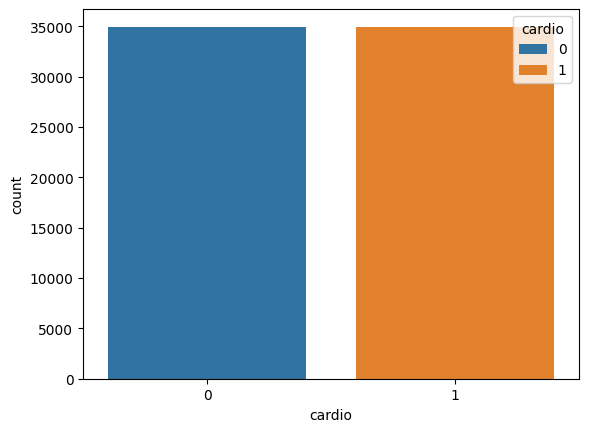

In [35]:
sns.countplot(df, x = "cardio", hue = "cardio")

The dataset looks pretty balanced.

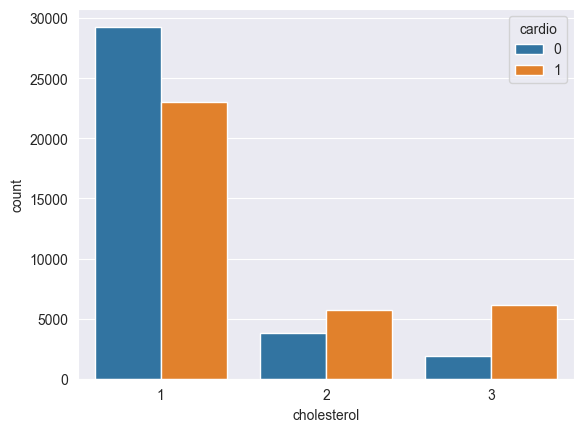

In [39]:
sns.countplot(df, x = "cholesterol", hue = "cardio")
sns.set_style('darkgrid')

In [44]:
df.query("cholesterol == 1")["cholesterol"].count()

52304

In [59]:
print (f"{df.query('cholesterol == 1')['cholesterol'].count() / df['cholesterol'].count() * 100.:1f}% of people in the database have normal cholesterol")
print (f"{df.query('cholesterol == 2')['cholesterol'].count() / df['cholesterol'].count() * 100.:1f}% of people in the database have cholesterol above normal")
print (f"{df.query('cholesterol == 3')['cholesterol'].count() / df['cholesterol'].count() * 100.:1f}% of people in the database have cholesterol which is well above normal")

74.833319% of people in the database have normal cholesterol
13.637794% of people in the database have cholesterol above normal
11.528887% of people in the database have cholesterol which is well above normal


In [60]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

<Axes: ylabel='count'>

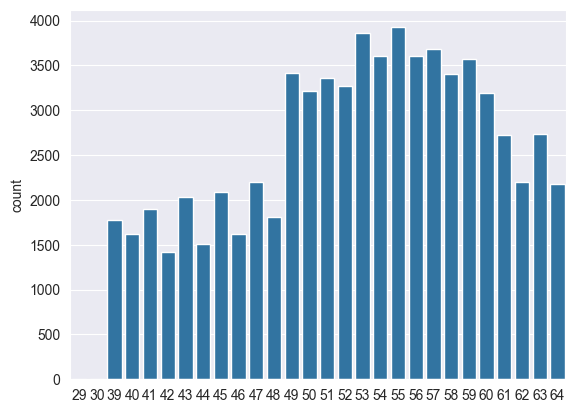

In [68]:
age = [int(value/365) for value in df["age"]]
sns.countplot(x = age)

In [78]:
print (f"The average age is {int(df['age'].mean()/365)}, with the median {int(df['age'].median()/365)} and the mode 55")

The average age is 53, with the median 53 and the mode 55


<Axes: xlabel='smoke', ylabel='count'>

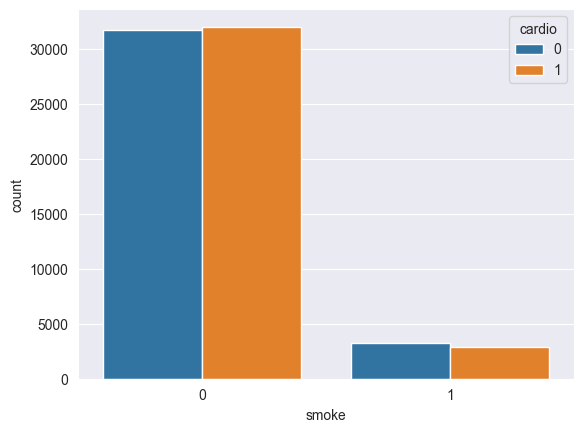

In [79]:
sns.countplot(df, x = "smoke", hue = "cardio")

In [80]:
print (f"{df.query('smoke == 1')['smoke'].count() / df['smoke'].count() * 100.:1f}% of people in the database are smokers")

8.817638% of people in the database are smokers


<Axes: xlabel='weight', ylabel='height'>

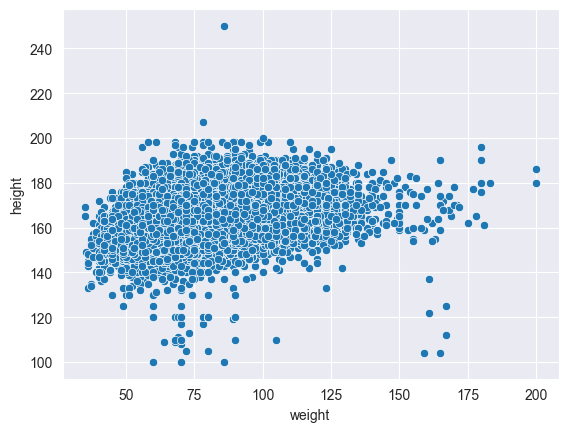

In [83]:
sns.scatterplot(df, x = "weight", y = "height")

In [84]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000,69894.000000
mean,19469.161516,1.349587,164.400406,74.219657,127.035568,81.761782,1.366956,1.226572,0.088176,0.053767,0.803674,0.499714
std,2466.982884,0.476843,7.990043,14.360540,17.087656,10.231216,0.680355,0.572377,0.283553,0.225559,0.397221,0.500003
min,10798.000000,1.000000,100.000000,35.000000,60.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Mary\AppData\Local\Temp\ipykernel_4080\243362388.py:2: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



[Text(0, 0, 'women'), Text(1, 0, 'men')]

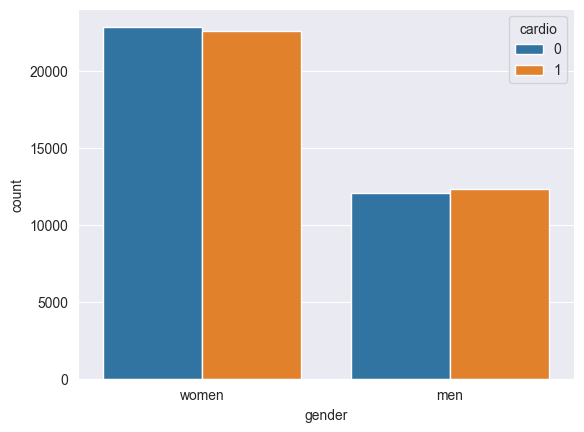

In [88]:
plot = sns.countplot(df, x = "gender", hue = "cardio")
plot.set_xticklabels(['women', 'men'])

In [96]:
print (f"The procent of women having the cardiovascular disease in the dataset (to the total number of women) is {df.query('gender == 1 and cardio ==1')['cardio'].count() / df.query('gender == 1')['cardio'].count() * 100.:1f}%")
print (f"The procent of men having the cardiovascular disease in the dataset (to the total number of men) is {df.query('gender == 2 and cardio ==1')['cardio'].count() / df.query('gender == 2')['cardio'].count() * 100.:1f}%")
print (f"Overall procent of women in the dataset is {df.query('gender == 1')['cardio'].count() / df['cardio'].count() * 100.:1f}%")

The procent of women having the cardiovascular disease in the dataset (to the total number of women) is 49.672239%
The procent of men having the cardiovascular disease in the dataset (to the total number of men) is 50.527953%
Overall procent of women in the dataset is 65.041348%


## Model design

Correlation matrix

<Axes: >

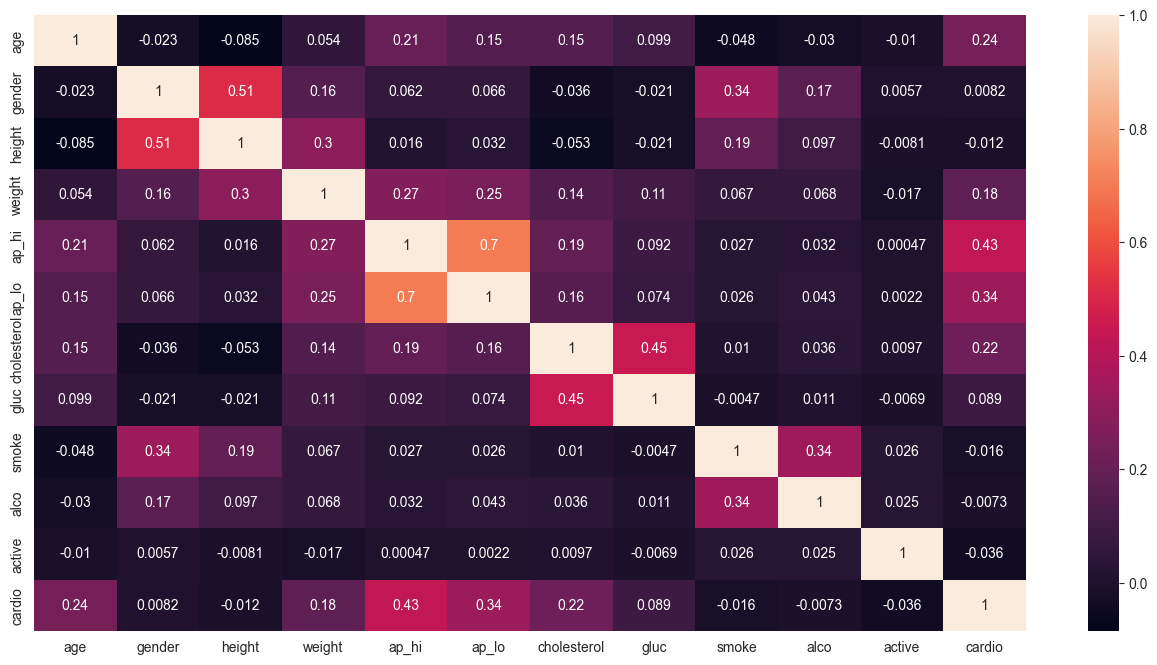

In [97]:
f, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(df.corr(), annot = True)

It seems that the highest influemce on the target varible is of the following factors:
- ap_hi / ap_lo (which are highly correlated themself), with a higher influence of ap_hi (r = 0.43)
- cholesterol (0.22), and there is also an association (r = 0.45) between cholesterol and glucose levels.
- age (0.24)
- weight (0.18)

Other factors seem to be insignificant, showing week or no correlation.